<a href="https://colab.research.google.com/github/Hashhhhhhhh/Quantum-Rings-Summer-School/blob/main/Amplitude_amplification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In quantum computing, we know that our final measurement result from our quantum cirucit is probabalistic. When we give something to a classical computer to compute, like multiplying two large numbers, it will give us the same answer every time. This is not so for a quantum computer. The goal of a quantum algorithm is to make the amplitude of the correct answer as large as possible and the amplitudes of the wrong answers as small as possible.

This brings us to another important building block for quantum algorithms: amplitude amplification. And to do this we use the phase flip oracle

In [2]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit-aer
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.1/126.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=840b61ebfe95a8049c3bba344fb1f326b6dee71a87d49020d733c6a278b6cdc1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.3 MB/s eta 0:00:00


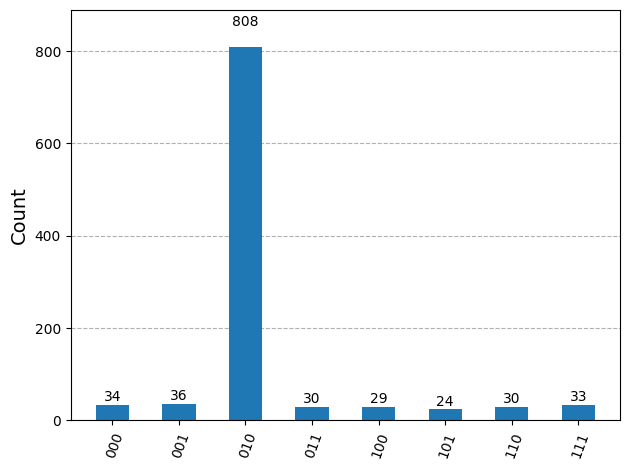

In [8]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from numpy import pi

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr, name="Amplitude Amplification")

for i in range(3):
    qc.h(qr[i])

qc.barrier()

#phase flip oracle for 101
qc.x(0)           # make control qubit 0 active for '1'
qc.x(2)           # make control qubit 2 active for '1'
qc.h(1)
qc.ccx(0,2,1)     # controlled on qubits 0 and 2 -> target qubit 1
qc.h(1)
qc.x(0)
qc.x(2)
qc.barrier()

#diffusion operator
qc.h(range(3))
qc.x(range(3))
qc.h(2)
qc.ccx(0,1,2)
qc.h(2)
qc.x(range(3))
qc.h(range(3))
qc.barrier()

#measuring
qc.measure(range(3), range(3))

# Running simulation
sim = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, sim)
# qobj = assemble(compiled, shots=1024) # assemble is not needed when using transpile
result = sim.run(compiled, shots=1024).result() # Pass the compiled circuit directly to run
counts = result.get_counts()

# Plotting results
plot_histogram(counts)

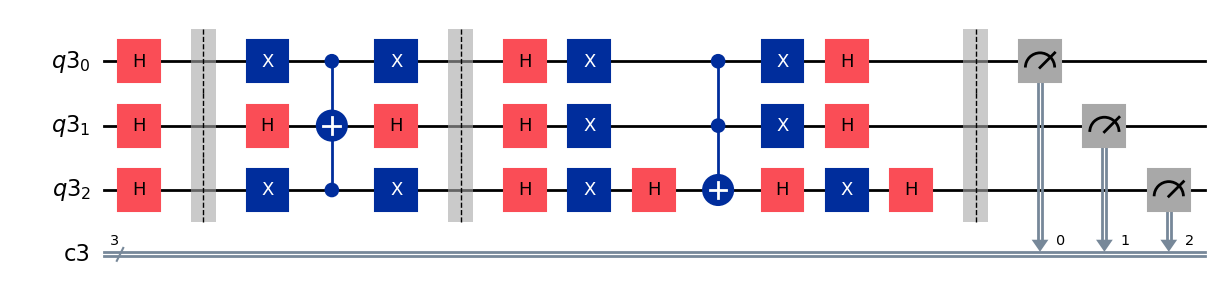

In [9]:
#drawing circuit
qc.draw('mpl')